In [73]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [74]:
def wrangle(file):

    #read csv
    df = pd.read_csv(file)

    # columns to drop due to high missing values
    cols_to_drop = ['Year', 'Class', 'Adm1', 'Adm6', 'Geo1', 'econ4', 'Adm3', 'Adm4', 'Adm5', 'Econ0', 'econ1', 'econ2', 'econ3', 'FndSrce1', 'function1', 'function2']
      
    #drop columns
    df.drop(columns = cols_to_drop, inplace=True)

    #remove empty spaces
    df.columns = df.columns.str.strip()

    #Remove characters from target numerical columns
    num_cols = ['Estimates', 'Revised', 'Executed']
    for col in num_cols:
        df[col] = df[col].astype(str)
        df[col] = df[col].str.replace(r'[^\d.-]', '', regex=True) 
        df[col] = df[col].replace(r'^\s*$', 'NaN', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce') 
    
    #handle missing data
    
    df.dropna(inplace=True) # Drop missing rows
    

    #change column names
    df.columns = ['Ministry', 'Estimates', 'Revised', 'Executed']
    
    #remove ministry code 
    df['Ministry'] = df['Ministry'].str.replace(r'^\d+\s*', '', regex=True)
    #mask to get only ministries
    mask = df['Ministry'].str.contains('Ministry')
    
    df = df[mask]

    #return dataframe
    return df

In [75]:
df = wrangle('kenya-boost-2006-2018.csv')
df.head()


/tmp/ipykernel_3565/3459501992.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,9,10,11,12,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


,Ministry,Estimates,Revised,Executed
0,Ministry of Agriculture,18318600.0,14062700.0,5893860.0
1,Ministry of Agriculture,12799450.0,9599587.0,3312808.0
2,Ministry of Agriculture,7218400.0,5652150.0,2911400.0
3,Ministry of Agriculture,10025827.0,8126744.0,4501504.0
4,Ministry of Agriculture,500000.0,1130625.0,95000.0


In [76]:
print('Shape of DataFrame', df.shape)

Shape of DataFrame (65073, 4)


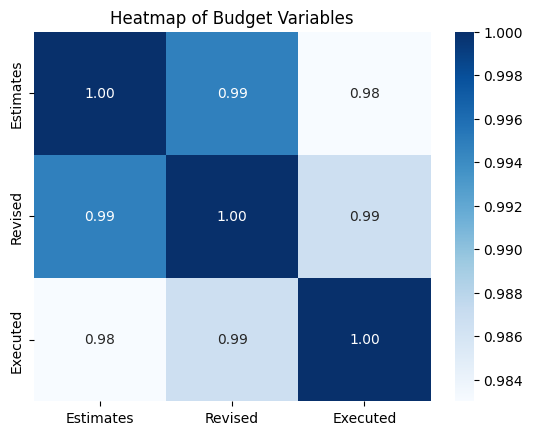

In [77]:
#find correlation
corr = df.drop(columns='Ministry').corr()#get correlation of numerical budget variables
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")#visualize correlation matrix
plt.title('Heatmap of Budget Variables');# title for heatmap


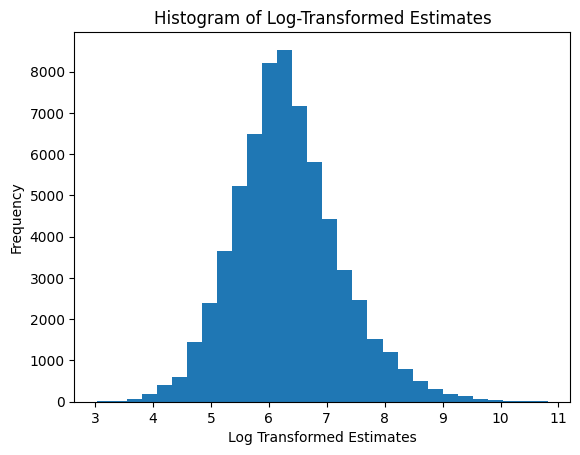

In [78]:
#visualize estimate variable

estimates = np.log10(df['Estimates'])#log10 since data spans large magnitude
estimates.plot(kind='hist', bins = 30)#plot histogram
plt.xlabel('Log Transformed Estimates')#label x-axis
plt.ylabel('Frequency')#label y axis
plt.title('Histogram of Log-Transformed Estimates'); #title

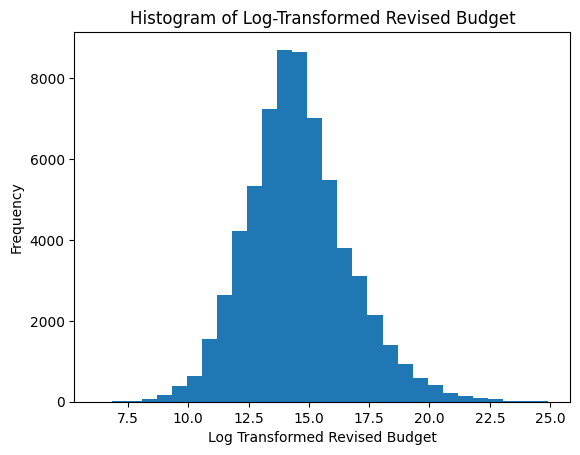

In [79]:
#visualize revised budgets

revised = np.log1p(df['Revised'])# log 1p since there are zeros
revised.plot(kind='hist', bins = 30)#plot histogram
plt.xlabel('Log Transformed Revised Budget')#label x-axis
plt.ylabel('Frequency')#label y axis
plt.title('Histogram of Log-Transformed Revised Budget'); #title

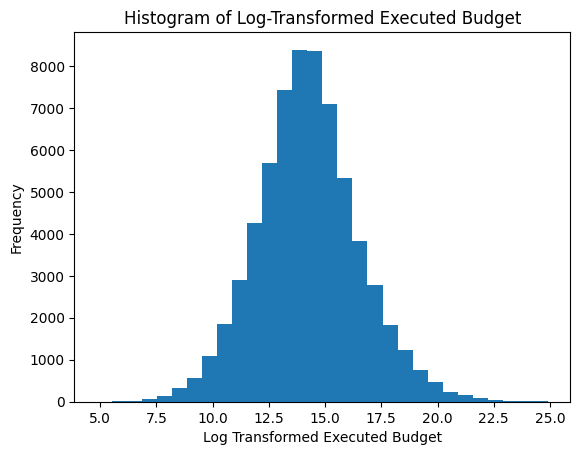

In [80]:
#visualize executed budget

executed = np.log1p(df['Executed'])# log 1p since there are zeros
executed.plot(kind='hist', bins = 30)#plot histogram
plt.xlabel('Log Transformed Executed Budget')#label x-axis
plt.ylabel('Frequency')#label y axis
plt.title('Histogram of Log-Transformed Executed Budget'); #title

In [96]:
#encode categorical variable
categorical = df.select_dtypes('object').columns
cat_dummies_df = pd.get_dummies(df[categorical], drop_first=True).astype('int')
cat_dummies_df.head()

,Ministry_Ministry of Cooperative Development and Marketing,Ministry_Ministry of Development of Northern Kenya and Other Arid Lands,Ministry_Ministry of East African Community,Ministry_Ministry of Education,Ministry_Ministry of Energy,Ministry_Ministry of Environment and Mineral Resources,Ministry_Ministry of Finance,Ministry_Ministry of Fisheries Development,Ministry_Ministry of Foreign Affairs,Ministry_Ministry of Forestry and Wildlife,...,Ministry_Ministry of State for Public Service,Ministry_Ministry of State for Special Programmes,Ministry_Ministry of Tourism,Ministry_Ministry of Trade,Ministry_Ministry of Transport,Ministry_Ministry of Water and Irrigation,Ministry_Ministry of Youth Affairs and Sports,Ministry_Ministry of lnformation and Communications,Ministry_Office of the Deputy Prime Minister and Ministry of Local Government,Ministry_Office of the Vice President and Ministry of Home Affairs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
#get numerical variables
num_variables = df.select_dtypes(['float','int']).columns
num_df = df[num_variables]
num_df.head()

,Estimates,Revised,Executed
0,18318600.0,14062700.0,5893860.0
1,12799450.0,9599587.0,3312808.0
2,7218400.0,5652150.0,2911400.0
3,10025827.0,8126744.0,4501504.0
4,500000.0,1130625.0,95000.0


In [103]:
#concatenate
encoded_df = pd.concat([cat_dummies_df, num_df], axis=1)
encoded_df.head()

,Ministry_Ministry of Cooperative Development and Marketing,Ministry_Ministry of Development of Northern Kenya and Other Arid Lands,Ministry_Ministry of East African Community,Ministry_Ministry of Education,Ministry_Ministry of Energy,Ministry_Ministry of Environment and Mineral Resources,Ministry_Ministry of Finance,Ministry_Ministry of Fisheries Development,Ministry_Ministry of Foreign Affairs,Ministry_Ministry of Forestry and Wildlife,...,Ministry_Ministry of Trade,Ministry_Ministry of Transport,Ministry_Ministry of Water and Irrigation,Ministry_Ministry of Youth Affairs and Sports,Ministry_Ministry of lnformation and Communications,Ministry_Office of the Deputy Prime Minister and Ministry of Local Government,Ministry_Office of the Vice President and Ministry of Home Affairs,Estimates,Revised,Executed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,18318600.0,14062700.0,5893860.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12799450.0,9599587.0,3312808.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7218400.0,5652150.0,2911400.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10025827.0,8126744.0,4501504.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,500000.0,1130625.0,95000.0
